In [2]:
import time
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from csep.utils.plotting import plot_mfd
import csep
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Comcat Synthetics
epoch_time = 709732655000
duration_in_years = 1.0
t0 = time.time()
comcat = csep.load_catalog(type='comcat', format='native',
                        start_epoch=epoch_time, duration_in_years=1.0,
                        min_magnitude=2.5, 
                        min_latitude=31.50, max_latitude=43.00,
                        min_longitude=-125.40, max_longitude=-113.10,
                    name='Comcat')
t1 = time.time()

# Statements about Comcat Downloads
print("Fetched Comcat catalog in {} seconds.\n".format(t1-t0))
print("Downloaded Comcat Catalog with following parameters")
print("Start Date: {}\nEnd Date: {}".format(str(comcat.start_time), str(comcat.end_time)))
print("Min Latitude: {} and Max Latitude: {}".format(comcat.min_latitude, comcat.max_latitude))
print("Min Longitude: {} and Max Longitude: {}".format(comcat.min_longitude, comcat.max_longitude))
print("Min Magnitude: {} and Max Magnitude: {}\n".format(comcat.min_magnitude, comcat.max_magnitude))


Fetched Comcat catalog in 7.476542234420776 seconds.

Downloaded Comcat Catalog with following parameters
Start Date: 1992-06-28 12:00:59.904000+00:00
End Date: 1993-06-28 02:33:55.456000+00:00
Min Latitude: 31.597166061401367 and Max Latitude: 41.83566665649414
Min Longitude: -125.38899993896484 and Max Longitude: -113.107666015625
Min Magnitude: 2.5 and Max Magnitude: 6.300000190734863



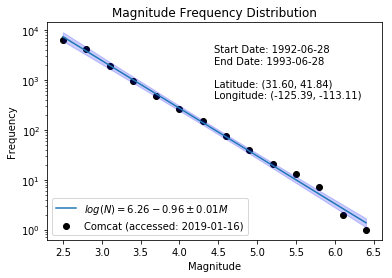

In [4]:
# test implementation
mfd = comcat.get_mfd()
plot_mfd(comcat, show=True)

In [5]:
from IPython.display import clear_output

# read in ucerf3 simulations
project_root = '/Users/wsavran/Projects/CSEP2/u3etas_simulations/landers_experiment'
filename = os.path.join(project_root, '10-23-2018_landers-pt1/results_complete.bin')
filename_nofaults = os.path.join(project_root, '10-31-2018_landers-nofaults-pt1/results_complete.bin')


In [7]:
u3catalogs = csep.load_stochastic_event_set(filename=filename, format='native', type='ucerf3', name='UCERF3-ETAS')

b_values = []
remaining = 10000
tot_time = 0
print('Processing stochastic event set...')
for catalog in u3catalogs:
    t0 = time.time()
    cat_id = catalog.catalog_id
    mfd = catalog.get_mfd()
    b_values.append(mfd.loc[0,'b'])
    t1 = time.time()
    tot_time = tot_time + (t1-t0)
    avg_time = tot_time/(cat_id+1)
    if cat_id % 250 == 0 and cat_id != 0:
        print('Estimated time remaining: {:.2f} seconds.'.format(remaining*avg_time))
    remaining = remaining - 1
    
print('Completed computed {} magnitude frequency distributions in {:.2f} seconds\nwith an average compute time of {:.2f} seconds.'
      .format(cat_id + 1, tot_time, avg_time))


Processing stochastic event set...
Estimated time remaining: 619.38 seconds.
Estimated time remaining: 607.35 seconds.
Estimated time remaining: 581.29 seconds.
Estimated time remaining: 563.10 seconds.
Estimated time remaining: 546.09 seconds.
Estimated time remaining: 530.49 seconds.
Estimated time remaining: 518.66 seconds.
Estimated time remaining: 502.94 seconds.
Estimated time remaining: 484.25 seconds.
Estimated time remaining: 467.15 seconds.
Estimated time remaining: 451.73 seconds.
Estimated time remaining: 436.01 seconds.
Estimated time remaining: 420.63 seconds.
Estimated time remaining: 406.44 seconds.
Estimated time remaining: 389.98 seconds.
Estimated time remaining: 373.56 seconds.
Estimated time remaining: 357.26 seconds.
Estimated time remaining: 341.48 seconds.
Estimated time remaining: 326.28 seconds.
Estimated time remaining: 310.98 seconds.
Estimated time remaining: 295.34 seconds.
Estimated time remaining: 280.00 seconds.
Estimated time remaining: 266.86 seconds.

In [8]:
u3catalogs = csep.load_stochastic_event_set(filename=filename, format='native', type='ucerf3', name='UCERF3-ETAS')
t0 = time.time()
b_values_test = list(map(lambda x: x.get_mfd().loc[0,'b'],u3catalogs))
t1 = time.time()
print('Processed {} catalogs in {:.2f} seconds.'.format(len(b_values_test), t1-t0))

Processed 10000 catalogs in 653.39 seconds.


Completed processing 10000 magnitude frequency distributions in 630.71 seconds
with an average compute time of 0.06 seconds per catalog.


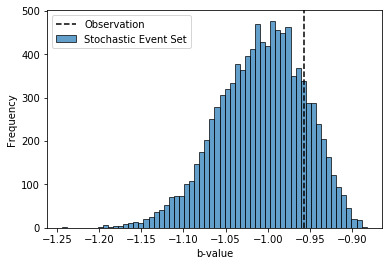

In [9]:
print('Completed processing {} magnitude frequency distributions in {:.2f} seconds\nwith an average compute time of {:.2f} seconds per catalog.'
      .format(cat_id + 1, tot_time, avg_time))
b_values = array(b_values)
b_value_comcat = comcat.mfd.loc[0, 'b']
fig = hist(b_values, bins = 60, edgecolor='black', alpha=0.7, label='Stochastic Event Set')
axvline(x=b_value_comcat, color='black', linestyle='--', label='Observation')
xlabel('b-value')
ylabel('Frequency')
legend(loc='upper left')

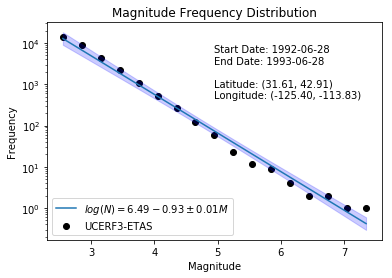

In [10]:
u3catalogs = csep.load_stochastic_event_set(filename=filename, format='native', type='ucerf3', name='UCERF3-ETAS')
catalog = next(u3catalogs)
catalog.get_mfd()
plot_mfd(catalog)

Text(0, 0.5, 'Frequency')

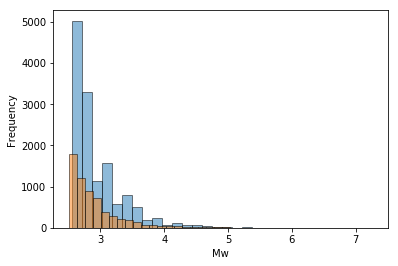

In [11]:
# plot histograms of comcat and single ucerf3 catalog
fig, ax = subplots()
mags = catalog.get_magnitudes()
comcat_mags = comcat.get_magnitudes()
h = hist(mags, bins=30, edgecolor='black', alpha=0.5)
hc = hist(comcat_mags, bins=30, edgecolor='black', alpha=0.5)
ax.set_xlabel('Mw')
ax.set_ylabel('Frequency')

Computed ECDF for two catalogs in 0.001216888427734375 seconds.


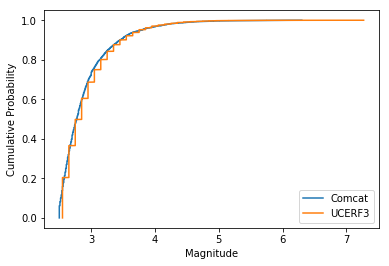

In [12]:
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys   
    
t0 = time.time()
ecdf_comcat = ecdf(comcat_mags)
ecdf_ucerf3 = ecdf(mags)
t1 = time.time()
print('Computed ECDF for two catalogs in {} seconds.'.format(t1-t0))

fig, ax = subplots()
plot(*ecdf(comcat_mags), label='Comcat')
plot(*ecdf(mags), label='UCERF3')
pyplot.xlabel('Magnitude')
pyplot.ylabel('Cumulative Probability')
legend(loc='lower right')

Processed 1000 catalogs.
Processed 2000 catalogs.
Processed 3000 catalogs.
Processed 4000 catalogs.
Processed 5000 catalogs.
Processed 6000 catalogs.
Processed 7000 catalogs.
Processed 8000 catalogs.
Processed 9000 catalogs.


Text(0, 0.5, 'Cumulative Probability')

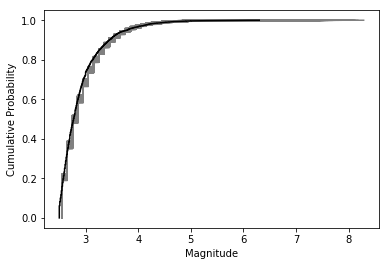

In [13]:
u3catalogs = csep.load_stochastic_event_set(filename=filename, format='native', type='ucerf3', name='UCERF3-ETAS')
fig, ax = subplots()
for catalog in u3catalogs:
    if catalog.catalog_id % 1000 == 0 and catalog.catalog_id != 0:
        print('Processed {} catalogs.'.format(catalog.catalog_id))
    mags = catalog.get_magnitudes()
    x, y = ecdf(mags)
    ax.plot(x, y, color='gray')

comcat_mags = comcat.get_magnitudes()
xc, yc = ecdf(comcat_mags)
ax.plot(xc, yc, color='black')
xlabel('Magnitude')
ylabel('Cumulative Probability')

The distribution of magnitudes from UCERF3 is discretized so that tests designed for continuous distribution functions will not work. Initially, we will try a test-designed for binned data such as the chi-square test.

The general process of the test will follow. 

1. compute ecdf for equally discretized magnitudes.
2. compute k-s statitistic for two distributions.
3. combine p-values using z-transform approach.

In [14]:
u3catalogs = list(csep.load_stochastic_event_set(filename=filename, format='native', type='ucerf3', name='UCERF3-ETAS'))

Note: UCERF3-ETAS appears to output discretized Mw for the ETAS events that do not have a fault-system solution (ie., fault-based rupture). The more precise Mw are given for fault-based ruptures in the model. The code below shows select rank statistics for different values in the unique Mw distribution.

In [146]:
mws = u3catalogs[0].get_magnitudes()
print(unique(mws))
print()
print(len(mws[mws == unique(mws)[0]]))
print(len(mws[mws == unique(mws)[-2]]))
print(len(mws[mws == unique(mws)[-1]]))
print(len(mws[mws > unique(mws)[-3]]))
print()
mws = u3catalogs[1].get_magnitudes()
print(unique(mws))
print()
print(len(mws[mws == unique(mws)[0]]))
print(len(mws[mws == unique(mws)[-2]]))
print(len(mws[mws == unique(mws)[-1]]))
print(len(mws[mws > unique(mws)[-3]]))
print()
mws = u3catalogs[2].get_magnitudes()
print(unique(mws))
print()
print(len(mws[mws == unique(mws)[0]]))
print(len(mws[mws == unique(mws)[-2]]))
print(len(mws[mws == unique(mws)[-1]]))
print(len(mws[mws > unique(mws)[-3]]))
print()

mws = comcat.get_magnitudes()
print(unique(mws))
print()
print(len(mws[mws == unique(mws)[0]]))
print(len(mws[mws == unique(mws)[-2]]))
print(len(mws[mws == unique(mws)[-1]]))
print(len(mws[mws > unique(mws)[-3]]))
print()

[2.55      2.65      2.75      2.85      2.95      3.05      3.15
 3.25      3.35      3.45      3.55      3.65      3.75      3.85
 3.95      4.05      4.15      4.25      4.35      4.45      4.55
 4.65      4.75      4.85      4.95      5.05      5.15      5.25
 5.35      5.45      5.65      5.75      5.85      5.95      6.05
 6.25      6.726647  7.2692304]

2807
1
1
2

[2.55     2.65     2.75     2.85     2.95     3.05     3.15     3.25
 3.35     3.45     3.55     3.65     3.75     3.85     3.95     4.05
 4.15     4.25     4.35     4.45     4.55     4.65     4.75     4.85
 4.95     5.05     5.15     5.25     5.35     5.45     5.55     5.65
 5.75     5.85     5.95     6.479811 6.765489]

2035
1
1
2

[2.55 2.65 2.75 2.85 2.95 3.05 3.15 3.25 3.35 3.45 3.55 3.65 3.75 3.85
 3.95 4.05 4.15 4.25 4.35 4.45 4.55 4.65 4.75 4.85 4.95 5.05 5.15 5.25
 5.35 5.45 5.55 5.85 6.35]

1756
1
1
2

[2.5  2.51 2.52 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63
 2.64 2.65 2.66 2.67 2.68 2.69 2.7  

### Investigating the K-S of the catalogs

The first approach to this evaluation would be the K-S test based on the empirical distribution functions of the observed catalog and stochastic event set. In the particular case of UCERF3-ETAS, the Mws of the events in the catalog are discretized with dMw = 0.1. This catalog appears to be discretized with dMw = 0.01. In our implementation of the test, the first step is to compute the ECDF on this interval. Effectively, this becomes a nearest-neighbor interpolation so that the same count is applied accross the magnitude bin.

2.5 6.3
2.55 7.2692304
2.5 7.2692304


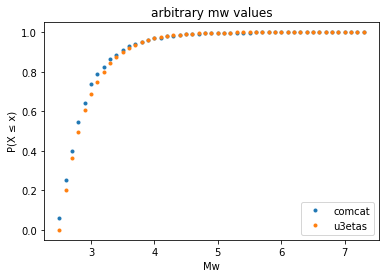

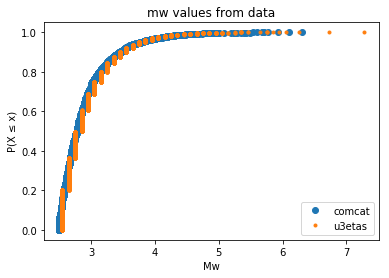

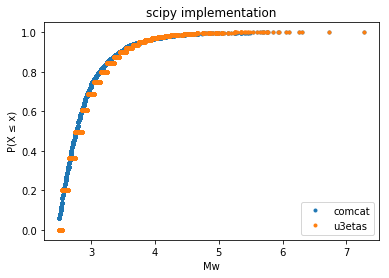

In [152]:
import csep.utils.stats as cstats

obs = comcat.get_magnitudes()
u3etas = u3catalogs[0].get_magnitudes()

print(min(obs), max(obs))
print(min(u3etas), max(u3etas))

global_min = min([min(obs), min(u3etas)])
global_max = max([max(obs), max(u3etas)])

print(global_min, global_max)

dmw = 0.1
mws = arange(global_min, global_max+dmw, dmw)

obs_ecdf = []
u3etas_ecdf = []
for mw in mws:
    obs_ecdf.append(cstats.less_equal_ecdf(obs, mw))
    u3etas_ecdf.append(cstats.less_equal_ecdf(u3etas, mw))

figure()
title("arbitrary mw values")
plot(mws, obs_ecdf, '.', label='comcat')
plot(mws, u3etas_ecdf, '.', label='u3etas')
xlabel('Mw')
ylabel('P(X ≤ x)')
legend()

figure()
title("mw values from data")
plot(*ecdf(obs), 'o', label='comcat')
plot(*ecdf(u3etas), '.', label='u3etas')
xlabel('Mw')
ylabel('P(X ≤ x)')
legend()

# plotting ecdf from scipy implementation
d1 = sort(obs)
d2 = sort(u3etas)
n1 = d1.shape[0]
n2 = d2.shape[0]
d_all = concatenate([d1, d2])
cdf1 = searchsorted(d1, d_all, side='right') / n1
cdf2 = searchsorted(d2, d_all, side='right') / n2

figure()
title("scipy implementation")
plot(d_all, cdf1, '.', label='comcat')
plot(d_all, cdf2, '.', label='u3etas')
xlabel('Mw')
ylabel('P(X ≤ x)')
legend()

In [154]:
import scipy

# ks_2samp computes ecdf1 and ecdf2 by concatenating all data and computing the prob estimate for x_i and y_i 
# in the concatenated data set.
result1 = scipy.stats.ks_2samp(obs, u3etas)
print(result1)

# our approach with smoothed ecdf functions
n1 = obs.shape[0]
n2 = u3etas.shape[0]
u3etas_ecdf = np.array(u3etas_ecdf)
obs_ecdf = np.array(obs_ecdf)
d = np.max(np.absolute(u3etas_ecdf-obs_ecdf))
en = np.sqrt(n1 * n2 / (n1 + n2))
# taken from scipy implementation
# the constants are from stephens, 1974. seem to be simplification for computing sqrt(n). is this needed today?
prob = scipy.stats.distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
print(d, prob)

Ks_2sampResult(statistic=0.1590145576707727, pvalue=3.541038302523404e-95)
0.06143017117261238 1.4458125121127325e-14


The test results greatly differ depending on the different calculation of the ECDF. In the case that the distribution functions are computed from the data directly (following the scipy implementation) we reject the null-hypothesis with p-value $\approx 1e-95$ or $1.44e-14$ depending on the treatment of the ECDF. The difference in p-value is caused by the change in $d$ due to the downsamping.

In [164]:
def my_ks2samp(data1, data2, dmw=0.1):
    # real version should force to be numpy arrays, etc.
    
    global_min = min([min(data1), min(data2)])
    global_max = max([max(data1), max(data2)])
    
    mws = arange(global_min, global_max+dmw, dmw)
    
    cdf1 = []
    cdf2 = []
    for mw in mws:
        cdf1.append(cstats.less_equal_ecdf(d1, mw))
        cdf2.append(cstats.less_equal_ecdf(d2, mw))
        
    n1 = data1.shape[0]
    n2 = data2.shape[0]
    cdf1 = np.array(cdf1)
    cdf2 = np.array(cdf2)
    
    d = np.max(np.absolute(cdf1-cdf2))
    en = np.sqrt(n1 * n2 / (n1 + n2))
    
    prob = scipy.stats.distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
    
    return(d, prob)

In [169]:
result2 = my_ks2samp(obs, u3etas)
print(result2)

(0.06143017117261238, 1.4458125121127325e-14)


### Aggregate p-values for all simulations



In [168]:
t0 = time.time()
p_values = []
for u3cat in u3catalogs:
    mws = u3cat.get_magnitudes()
    d, p_val = my_ks2samp(obs, mws)
    p_values.append(p_val)
t1 = time.time()
print('computed k-s test for all samples in {} seconds.'.format(t1-t0))


computed k-s test for all samples in 328.2441849708557 seconds.


Text(0, 0.5, 'count')

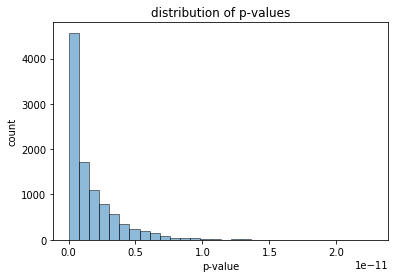

In [181]:
ax = hist(p_values, bins=30, edgecolor='black', alpha=0.5)
title('distribution of p-values')
xlabel('p-value')
ylabel('count')

-712.9264224816454 1.0


Text(0.5, 1.0, 'distribution of z-transformed values')

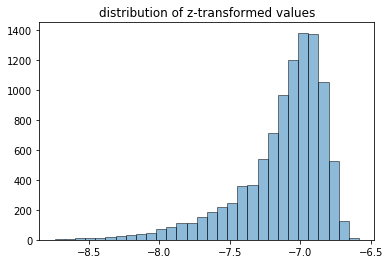

In [182]:
# combine using Z-transform [Whitlock, 2005]
z_values = []
k = len(p_values)
for p in p_values:
    z_values.append(scipy.stats.norm.ppf(p))
z_stat = np.sum(np.array(z_values))/sqrt(k)
p_value = scipy.stats.norm.sf(z_stat)
print(z_stat, p_value)

ax = hist(z_values, bins=30, edgecolor='black', alpha=0.5)
title('distribution of z-transformed values')